Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8794 - loss: 0.4154 - val_accuracy: 0.9611 - val_loss: 0.1284
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9677 - loss: 0.1078 - val_accuracy: 0.9720 - val_loss: 0.0897
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9789 - loss: 0.0690 - val_accuracy: 0.9714 - val_loss: 0.0857
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9833 - loss: 0.0503 - val_accuracy: 0.9750 - val_loss: 0.0793
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9868 - loss: 0.0391 - val_accuracy: 0.9799 - val_loss: 0.0679


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.8931 - loss: 0.3461 - val_accuracy: 0.9839 - val_loss: 0.0503
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9847 - loss: 0.0482 - val_accuracy: 0.9878 - val_loss: 0.0378
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9895 - loss: 0.0309 - val_accuracy: 0.9887 - val_loss: 0.0326
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9931 - loss: 0.0214 - val_accuracy: 0.9887 - val_loss: 0.0327
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9943 - loss: 0.0175 - val_accuracy: 0.9917 - val_loss: 0.0269


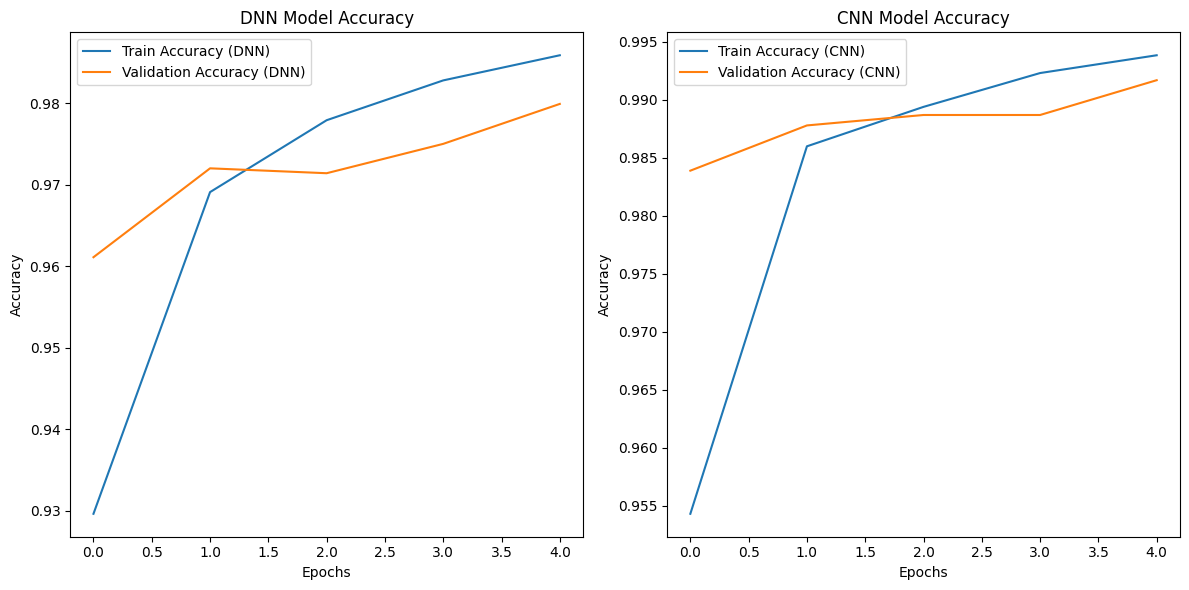

313/313 - 1s - 2ms/step - accuracy: 0.9799 - loss: 0.0679
DNN Test accuracy: 97.99%
313/313 - 4s - 12ms/step - accuracy: 0.9917 - loss: 0.0269
CNN Test accuracy: 99.17%


In [5]:
# 引入必要的庫
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 載入 MNIST 數據集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 資料預處理：將圖像數據縮放到 [0, 1] 區間
x_train, x_test = x_train / 255.0, x_test / 255.0

# 重塑資料形狀
# DNN: 將 28x28 的圖像展開為一維向量
x_train_dnn = x_train.reshape(-1, 28 * 28)
x_test_dnn = x_test.reshape(-1, 28 * 28)

# CNN: 將圖像維持 28x28x1 的形狀，這樣 CNN 可以處理
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# 將標籤轉換為 one-hot 編碼
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# ------------------- DNN 模型 ---------------------
dnn_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 編譯 DNN 模型
dnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# 訓練 DNN 模型
dnn_history = dnn_model.fit(x_train_dnn, y_train, epochs=5, batch_size=32, validation_data=(x_test_dnn, y_test))

# ------------------- CNN 模型 ---------------------
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 編譯 CNN 模型
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# 訓練 CNN 模型
cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=5, batch_size=32, validation_data=(x_test_cnn, y_test))

# ------------------- 比較 DNN 和 CNN 模型的準確率 -------------------
# 繪製兩個模型的訓練與驗證準確率

plt.figure(figsize=(12, 6))

# DNN 模型準確率
plt.subplot(1, 2, 1)
plt.plot(dnn_history.history['accuracy'], label='Train Accuracy (DNN)')
plt.plot(dnn_history.history['val_accuracy'], label='Validation Accuracy (DNN)')
plt.title('DNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# CNN 模型準確率
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy (CNN)')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy (CNN)')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------- 評估 DNN 和 CNN 模型 -------------------
# 評估 DNN 模型
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_dnn, y_test, verbose=2)
print(f"DNN Test accuracy: {dnn_test_acc * 100:.2f}%")

# 評估 CNN 模型
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=2)
print(f"CNN Test accuracy: {cnn_test_acc * 100:.2f}%")